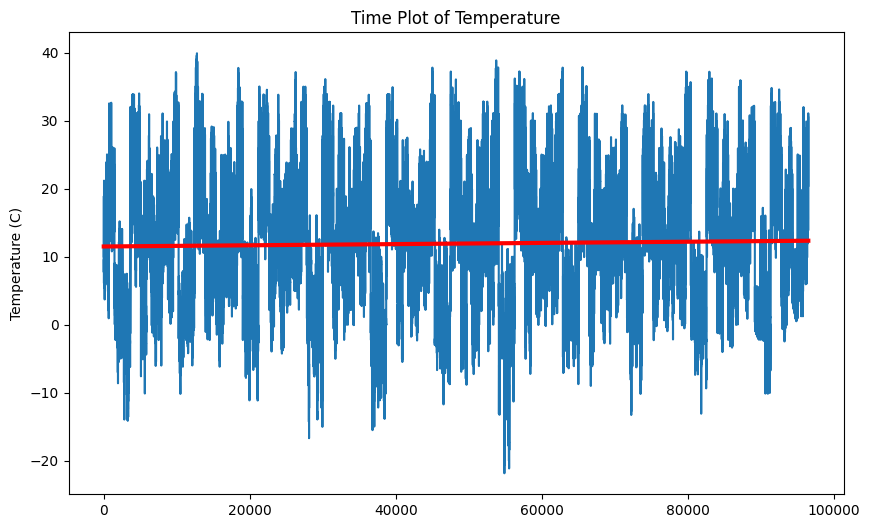

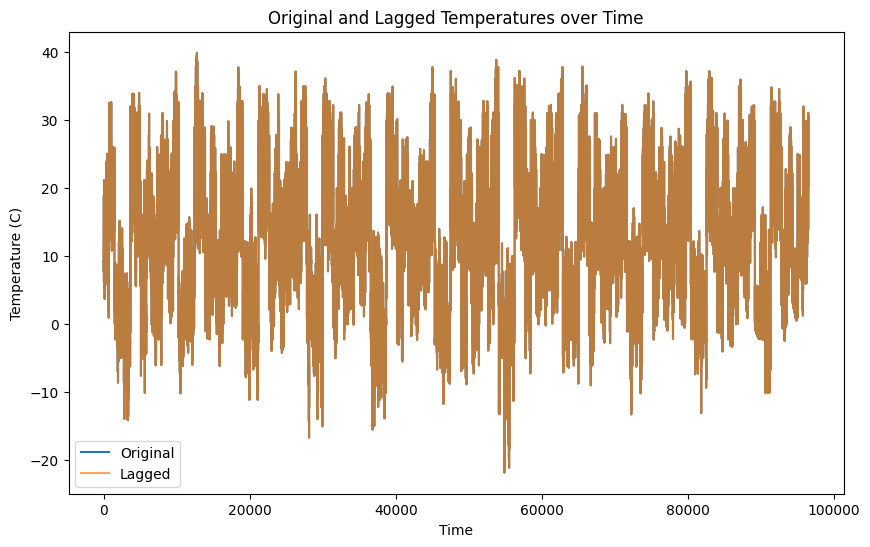

/kaggle/input/weather-dataset/weatherHistory.csv


In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
df= pd.read_csv("/kaggle/input/weather-dataset/weatherHistory.csv")



#Creating time dummy
df['Time'] = np.arange(len(df.index))

#print(df.head())
#feature
X = df.loc[:, ['Time']]

#target
y = df.loc[:, 'Temperature (C)']

model = LinearRegression()
model.fit(X, y)

ax = y.plot(figsize=(10, 6), title='Time Plot of Temperature')
ax.set_ylabel('Temperature (C)')
ax.grid(True)

y_pred.plot(ax=ax, linewidth=3, color='red')

df['Temperature_Lag1'] = df['Temperature (C)'].shift(1)  # Create a new column with lagged temperature

# Dropping the first row because it will have NaN for the lagged feature
df = df.dropna()

# The original and lagged temperatures
plt.figure(figsize=(10, 6))

# Plot original temperature
plt.plot(df['Time'], df['Temperature (C)'], label='Original')

# Plot lagged temperature
plt.plot(df['Time'], df['Temperature_Lag1'], label='Lagged', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.title('Original and Lagged Temperatures over Time')
plt.legend()
plt.show()


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session